# Red Neuronal con sklearn

In [55]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets        import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

In [57]:
from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network  import MLPRegressor
from sklearn.neural_network  import BernoulliRBM

## Dataset

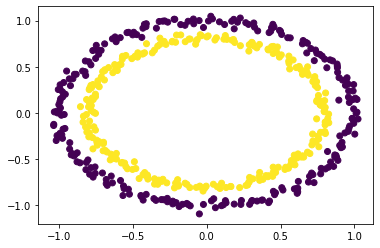

In [3]:
C,c = make_circles(500, random_state=1234, noise=0.03) 

plt.scatter(C[:,0],C[:,1],c=c)

In [12]:
Ct, Cp, ct, cp = train_test_split(C,c)

In [101]:
rnn = MLPClassifier(hidden_layer_sizes=(20,5), 
                    activation='relu', 
                    alpha=0.001, 
                    solver='adam')


In [102]:
rnn.fit(Ct,ct)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 5))

In [103]:
rnn.score(Cp,cp)

0.824

In [104]:
yp = rnn.predict(Cp)

In [105]:
confusion_matrix(yp,cp)

array([[60, 16],
       [ 6, 43]])

In [106]:
for y,p in zip(cp, yp):
    if(y==p):
        print("era {} obtuve {}".format(y,p))
    else:
        print("era {} obtuve {} *".format(y,p))

era 0 obtuve 0
era 1 obtuve 1
era 1 obtuve 0 *
era 0 obtuve 0
era 1 obtuve 1
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 1
era 1 obtuve 0 *
era 1 obtuve 1
era 1 obtuve 1
era 1 obtuve 1
era 1 obtuve 1
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 1
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 1
era 1 obtuve 1
era 0 obtuve 0
era 1 obtuve 1
era 0 obtuve 1 *
era 0 obtuve 0
era 1 obtuve 0 *
era 1 obtuve 0 *
era 0 obtuve 0
era 0 obtuve 1 *
era 0 obtuve 0
era 1 obtuve 0 *
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 0 *
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 1
era 1 obtuve 1
era 1 obtuve 1
era 1 obtuve 1
era 0 obtuve 0
era 1 obtuve 1
era 0 obtuve 0
era 1 obtuve 1
era 1 obtuve 1
era 1 obtuve 1
era 0 obtuve 0
era 0 obtuve 1 *
era 1 obtuve 1
era 1 obtuve 1
era 0 obtuve 0
era 0 obtuve 0
era 1 obtuve 1
era 0 obtuve 0
era 0 o

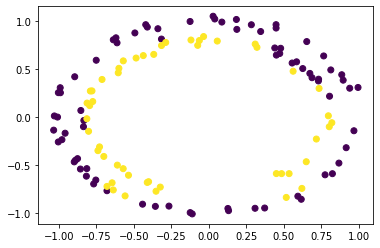

In [107]:
plt.scatter(Cp[:,0],Cp[:,1],c=yp)

### Búsqueda de parámetros

In [164]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import Pipeline

clf = MLPClassifier()
parameter = {'hidden_layer_sizes':[(21,5),(18,7),(20,5)], 
             'alpha':[0.001, 0.0001],
             'activation':['relu','tanh']}


In [139]:
cv = RandomizedSearchCV(clf,parameter).fit(Ct,ct)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [140]:
cv.best_score_

0.8

In [141]:
cv.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 5))

In [142]:
cv.best_params_

{'hidden_layer_sizes': (20, 5), 'alpha': 0.001, 'activation': 'relu'}

In [155]:
clf = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(10,8))

In [156]:
clf.fit(Ct,ct)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(10, 8))

In [157]:
yp = clf.predict(Cp)

In [158]:
for y,p in zip(yp, cp):
    print("obtuve {} era {}".format(y,p))

obtuve 0 era 0
obtuve 1 era 1
obtuve 0 era 1
obtuve 1 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 0 era 0
obtuve 1 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 0 era 0
obtuve 1 era 1
obtuve 1 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 1 era 1
obtuve 0 era 0
obtuve 1 era 0
obtuve 1 era 1
obtuve 1 era 1
obtuve 0 era 0
obtuve 1 era 0
obtuve 1 era 1
obtuve 0 era 0
obtuve 0 era 0
obtuve 1 e

In [159]:
clf.score(Cp,cp)

0.872

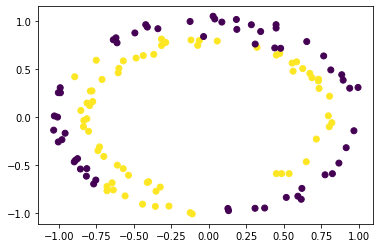

In [160]:
plt.scatter(Cp[:,0],Cp[:,1],c=yp)

Referencia de MLPClassifer [aqui](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py)